<a href="https://colab.research.google.com/github/chawonlee/AI_svm_mlp_deepmlp/blob/master/cat_and_dog_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
# 기본 경로
base_dir = '/content/drive/MyDrive/archive'

training_set = os.path.join(base_dir, 'training_set')
test_set = os.path.join(base_dir, 'test_set')

# 훈련에 사용되는 고양이/개 이미지 경로
training_set_cats = os.path.join(training_set, 'cats')
training_set_dogs = os.path.join(training_set, 'dogs')
print(training_set_cats)
print(training_set_dogs)

# 테스트에 사용되는 고양이/개 이미지 경로
test_set_cats = os.path.join(test_set, 'cats')
test_set_dogs = os.path.join(test_set, 'dogs')
print(test_set_cats)
print(test_set_dogs)

/content/drive/MyDrive/archive/training_set/cats
/content/drive/MyDrive/archive/training_set/dogs
/content/drive/MyDrive/archive/test_set/cats
/content/drive/MyDrive/archive/test_set/dogs


In [21]:
!pip install python-resize-image
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image
from torchvision.datasets import ImageFolder
from resizeimage import resizeimage

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score

In [22]:
# importing images using torchvision
dataset = ImageFolder("/content/drive/MyDrive/archive/training_set")
# creating labels dataframe
imgs, labels = zip(*dataset.imgs)
imgs = list(imgs)
labels = list(labels)
labels_df = pd.DataFrame({'image': imgs, 'label':labels})
labels_df

,image,label
0,/content/drive/MyDrive/archive/training_set/ca...,1
1,/content/drive/MyDrive/archive/training_set/ca...,1
2,/content/drive/MyDrive/archive/training_set/ca...,1
3,/content/drive/MyDrive/archive/training_set/ca...,1
4,/content/drive/MyDrive/archive/training_set/ca...,1
...,...,...
8010,/content/drive/MyDrive/archive/training_set/do...,2
8011,/content/drive/MyDrive/archive/training_set/do...,2
8012,/content/drive/MyDrive/archive/training_set/do...,2
8013,/content/drive/MyDrive/archive/training_set/do...,2


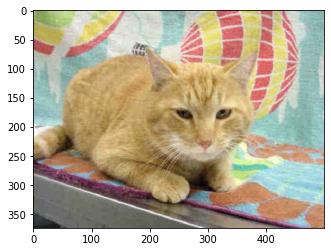

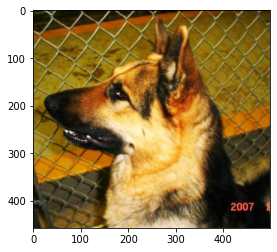

In [23]:
def get_image(path):
    img = Image.open(path)
    return np.array(img)

# showing a dog image
dog_row = labels_df[labels_df.label == 1].reset_index().image[23]
plt.imshow(get_image(dog_row))
plt.show()

# showing a cat image
cat_row = labels_df[labels_df.label == 2].reset_index().image[79]
plt.imshow(get_image(cat_row))
plt.show()

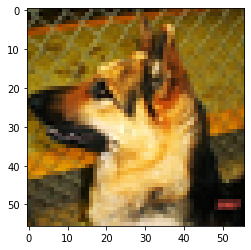

In [24]:
# image manupulation
img = Image.open(cat_row)
img = resizeimage.resize_cover(img, [56, 56])
plt.imshow(np.array(img), cmap='gray')
plt.show()

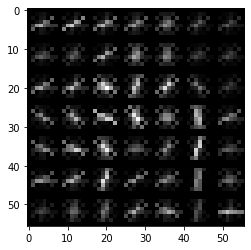

In [25]:
hog_features, hog_img = hog(img, visualize=True, block_norm='L2-Hys', pixels_per_cell=(8,8))
plt.imshow(np.array(hog_img), cmap='gray')
plt.show()

In [26]:
def create_features(path):
    img = Image.open(path)
    img = resizeimage.resize_cover(img, [56, 56])
    img_arr = np.array(img)
    # flatten three channel color image
    color_features = img_arr.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img_arr)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(8, 8))
    # combine color and hog features into a single array
    flat_features = np.hstack((color_features, hog_features))
    return flat_features

dog_features = create_features(dog_row)
print(dog_features.shape)

(11433,)


In [27]:
def create_feature_matrix(label_df):
    features_list = []
    
    for img_path in labels_df.image:
        # get features for image
        img_features = create_features(img_path)
        features_list.append(img_features)
    
    feature_matrix = np.array(features_list)
    return feature_matrix

feature_matrix = create_feature_matrix(labels_df)

In [28]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
imgs_stand = ss.fit_transform(feature_matrix)

Feature matrix shape is:  (8015, 11433)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(imgs_stand,
                                                    labels_df.label.values,
                                                    test_size=0.3,
                                                    )

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd', verbose=True)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.66795406
Iteration 2, loss = 0.46653500
Iteration 3, loss = 0.37194953
Iteration 4, loss = 0.30072899
Iteration 5, loss = 0.23723630
Iteration 6, loss = 0.18596934
Iteration 7, loss = 0.13868031
Iteration 8, loss = 0.10563211
Iteration 9, loss = 0.07736425
Iteration 10, loss = 0.05760983
Iteration 11, loss = 0.04341585
Iteration 12, loss = 0.03487814
Iteration 13, loss = 0.02860298
Iteration 14, loss = 0.02375128
Iteration 15, loss = 0.02044813
Iteration 16, loss = 0.01787536
Iteration 17, loss = 0.01583479
Iteration 18, loss = 0.01416336
Iteration 19, loss = 0.01278867
Iteration 20, loss = 0.01159862
Iteration 21, loss = 0.01066869
Iteration 22, loss = 0.00988956
Iteration 23, loss = 0.00916006
Iteration 24, loss = 0.00855592
Iteration 25, loss = 0.00802570
Iteration 26, loss = 0.00750148
Iteration 27, loss = 0.00710065
Iteration 28, loss = 0.00666547
Iteration 29, loss = 0.00635100
Iteration 30, loss = 0.00602102
Iteration 31, loss = 0.00574958
Iteration 32, los

In [31]:
# calculate accuracy
accuracy = accuracy_score(y_pred, y_test)
print('mlp 정확률 : ', accuracy*100)

mlp 정확률 :  71.55925155925156


In [32]:
from random import randint

test = ImageFolder("/content/drive/MyDrive/archive/test_set")
imgs, labels = zip(*test.imgs)
imgs = list(imgs)
labels = list(labels)

예측: Cat
실제: Dog


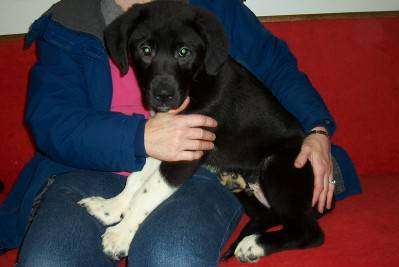

In [39]:
random_ix = randint(0, len(imgs))
label = {1: 'Cat', 2:'Dog'}
rand_img = imgs[random_ix]
# create features of the image
test_features = create_features(rand_img)
# predict
prediction = mlp.predict([test_features])
print("예측: " + label[prediction[0]])
print("실제: " + label[labels[random_ix]])
# display image
display(Image.open(rand_img))